In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.stats import permutation_cluster_1samp_test as pcluster_test 


In [3]:
fnames = eegbci.load_data(subject=1, runs=(6, 10, 14))
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in fnames])

raw.rename_channels(lambda x: x.strip(".")) # remove dots from channel names 
# rename descriptions to be more easily interpretable 
raw.annotations.rename(dict(T1="hands", T2="feet"))

Extracting EDF parameters from C:\Users\uiseong\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\uiseong\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\uiseong\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<Annotations | 94 segments: BAD boundary (2), EDGE boundary (2), T0 (45), ...>

In [4]:
tmin, tmax = -1, 4 
event_ids = dict(hands=2, feet=3) # map event IDs to tasks 

epochs = mne.Epochs(
    raw, 
    event_id=["hands", "feet"],
    tmin=tmin - 0.5,
    tmax=tmax + 0.5,
    picks=("C3", "Cz", "C4"),
    baseline=None,
    preload=True,
)

Used Annotations descriptions: ['T0', 'feet', 'hands']
Ignoring annotation durations and creating fixed-duration epochs around annotation onsets.
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 961 original time points ...
0 bad epochs dropped


In [5]:
freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

Applying baseline correction (mode: percent)
Using a threshold of 1.724718
stat_fun(H1): min=-8.55207615547707 max=3.1832308002458687
Running initial clustering …
Found 80 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-8.55207615547707 max=3.1832308002458687
Running initial clustering …
Found 67 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-4.528367198129934 max=3.7064219374431913
Running initial clustering …
Found 88 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-4.528367198129934 max=3.7064219374431913
Running initial clustering …
Found 58 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-6.581589289696412 max=3.3464481519969005
Running initial clustering …
Found 67 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-6.581589289696412 max=3.3464481519969005
Running initial clustering …
Found 69 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


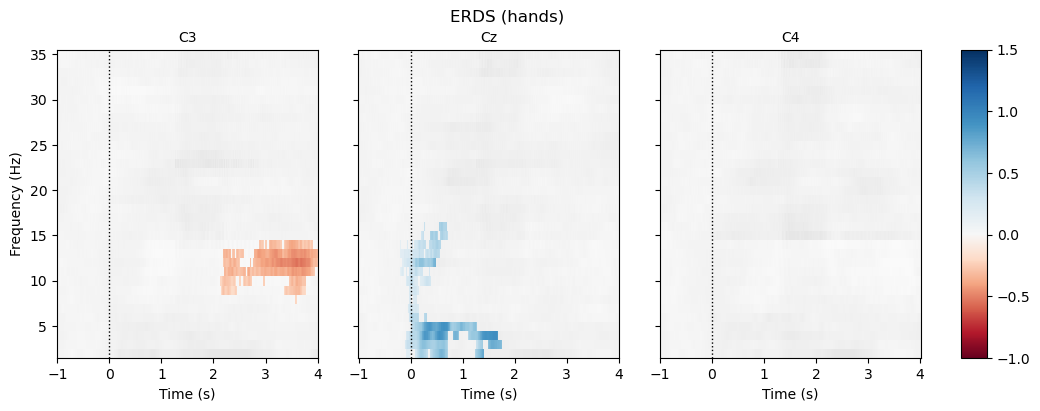

Using a threshold of 1.713872
stat_fun(H1): min=-3.7547594984972466 max=3.3607039428313774
Running initial clustering …
Found 71 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.713872
stat_fun(H1): min=-3.7547594984972466 max=3.3607039428313774
Running initial clustering …
Found 80 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-4.992503139561788 max=5.416450269990028
Running initial clustering …
Found 103 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.713872
stat_fun(H1): min=-4.992503139561788 max=5.416450269990028
Running initial clustering …
Found 67 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-6.044339991978301 max=4.070443782271567
Running initial clustering …
Found 92 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.713872
stat_fun(H1): min=-6.044339991978301 max=4.070443782271567
Running initial clustering …
Found 51 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


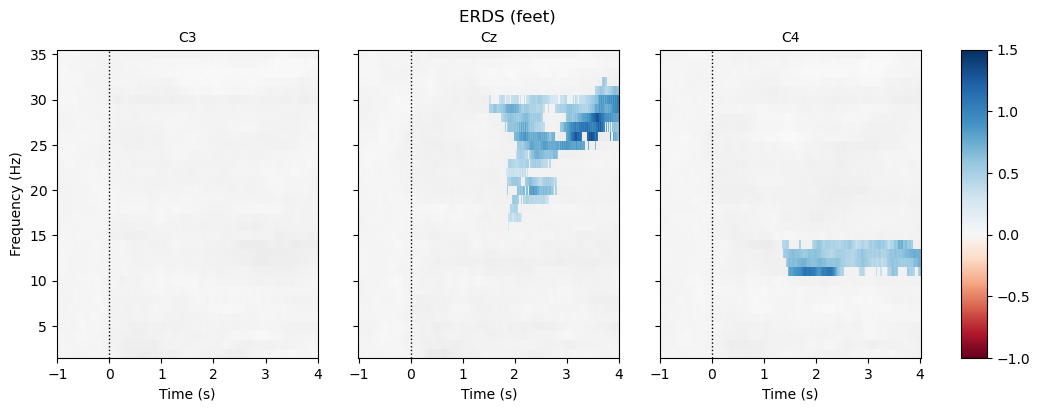

In [6]:
# 1. 시간-주파수 표현(Time-Frequency Representation) 계산
tfr = epochs.compute_tfr(
    method="multitaper",    # 멀티테이퍼 방법 사용 (노이즈에 강한 주파수 분석 방법)
    freqs=freqs,           # 분석할 주파수 범위 (2-35Hz)
    n_cycles=freqs,        # 각 주파수별 사이클 수
    use_fft=True,          # FFT 사용
    return_itc=False,      # ITC(Inter-Trial Coherence) 반환하지 않음
    average=False,         # 트라이얼 평균하지 않음
    decim=2,               # 데이터 다운샘플링 (2배 감소)
)

# 2. 시간 범위 자르기 및 베이스라인 보정
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

# 3. 각 이벤트(hands, feet)에 대해 반복
for event in event_ids:
    # 4. 해당 이벤트의 데이터 선택
    tfr_ev = tfr[event]
    
    # 5. 4개의 서브플롯 생성 (3개는 ERDS 맵, 1개는 컬러바용)
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), 
        gridspec_kw={"width_ratios": [10, 10, 10, 1]}  # 컬러바 영역 비율 설정
    )
    
    # 6. 각 채널(C3, Cz, C4)에 대해 반복
    for ch, ax in enumerate(axes[:-1]):
        # 7. 양의 클러스터 검정 (ERD)
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # 8. 음의 클러스터 검정 (ERS)
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # 9. 유의한 클러스터 결합 (p <= 0.05)
        c = np.stack(c1 + c2, axis=2)  # 클러스터 결합
        p = np.concatenate((p1, p2))   # p값 결합
        mask = c[..., p <= 0.05].any(axis=-1)  # 유의한 영역 마스크 생성

        # 10. ERDS 맵 시각화
        tfr_ev.average().plot(
            [ch],           # 현재 채널
            cmap="RdBu",    # 빨강-파랑 컬러맵
            cnorm=cnorm,    # 컬러 정규화
            axes=ax,        # 현재 축
            colorbar=False, # 개별 컬러바 없음
            show=False,     # 즉시 표시하지 않음
            mask=mask,      # 유의한 영역 마스크
            mask_style="mask"  # 마스크 스타일
        )

        # 11. 제목 및 이벤트 라인 추가
        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # 이벤트 시점 표시
        
        # 12. 첫 번째 채널이 아닌 경우 y축 레이블 제거
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    
    # 13. 컬러바 추가
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    
    # 14. 전체 그림 제목 설정 및 표시
    fig.suptitle(f"ERDS ({event})")
    plt.show()

In [7]:
# tfr = epochs.compute_tfr(
#     method="multitaper",
#     freqs=freqs,
#     n_cycles=freqs,
#     use_fft=True,
#     return_itc=False,
#     average=False,
#     decim=2,
# )
# tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

# for event in event_ids:
#     # select desired epochs for visualization
#     tfr_ev = tfr[event]
#     fig, axes = plt.subplots(
#         1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
#     )
#     for ch, ax in enumerate(axes[:-1]):  # for each channel
#         # positive clusters
#         _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
#         # negative clusters
#         _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

#         # note that we keep clusters with p <= 0.05 from the combined clusters
#         # of two independent tests; in this example, we do not correct for
#         # these two comparisons
#         c = np.stack(c1 + c2, axis=2)  # combined clusters
#         p = np.concatenate((p1, p2))  # combined p-values
#         mask = c[..., p <= 0.05].any(axis=-1)

#         # plot TFR (ERDS map with masking)
#         tfr_ev.average().plot(
#             [ch],
#             cmap="RdBu",
#             cnorm=cnorm,
#             axes=ax,
#             colorbar=False,
#             show=False,
#             mask=mask,
#             mask_style="mask",
#         )

#         ax.set_title(epochs.ch_names[ch], fontsize=10)
#         ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
#         if ch != 0:
#             ax.set_ylabel("")
#             ax.set_yticklabels("")
#     fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
#     fig.suptitle(f"ERDS ({event})")
#     plt.show()

In [11]:
df = tfr.to_data_frame(time_format=None)
df.tail(50)

,time,freq,epoch,condition,C3,Cz,C4
613480,3.3875,35.0,89,feet,-0.579966,-0.615429,-0.212288
613481,3.4000,35.0,89,feet,-0.591576,-0.618106,-0.253958
613482,3.4125,35.0,89,feet,-0.577814,-0.613012,-0.196225
613483,3.4250,35.0,89,feet,-0.576909,-0.627799,-0.211645
613484,3.4375,35.0,89,feet,-0.588368,-0.629658,-0.256145
613485,3.4500,35.0,89,feet,-0.580868,-0.626443,-0.231596
613486,3.4625,35.0,89,feet,-0.559925,-0.637085,-0.201164
613487,3.4750,35.0,89,feet,-0.544301,-0.619760,-0.090257
613488,3.4875,35.0,89,feet,-0.588577,-0.612005,-0.279975
613489,3.5000,35.0,89,feet,-0.517534,-0.583266,0.221970


Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


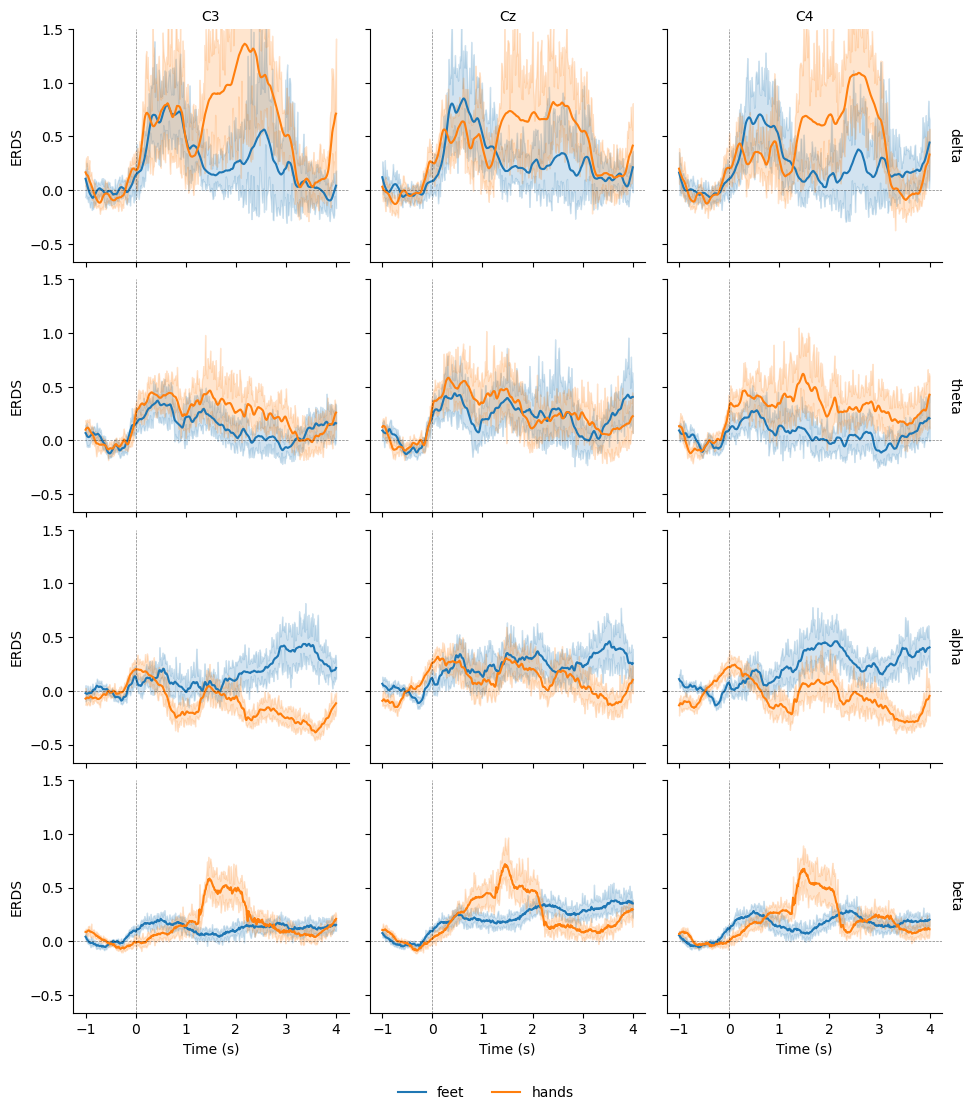

In [12]:
df = tfr.to_data_frame(time_format=None, long_format=True)

# Map to frequency bands:
freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
df = df[df.band.isin(freq_bands_of_interest)]
df["band"] = df["band"].cat.remove_unused_categories()

# Order channels for plotting:
df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4"), ordered=True)

g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
g.set(ylim=(None, 1.5))
g.set_axis_labels("Time (s)", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc="lower center")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

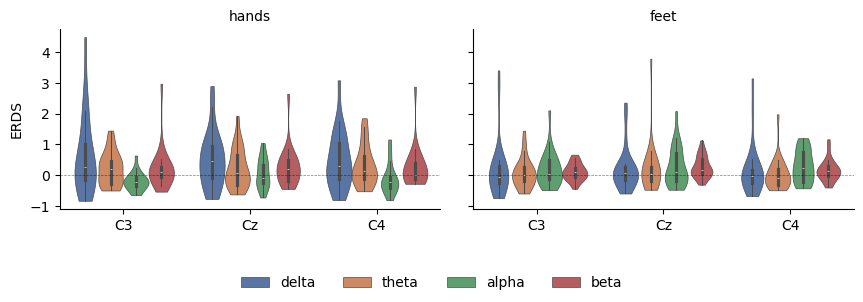

In [13]:
df_mean = (
    df.query("time > 1")
    .groupby(["condition", "epoch", "band", "channel"], observed=False)[["value"]]
    .mean()
    .reset_index()
)

g = sns.FacetGrid(
    df_mean, col="condition", col_order=["hands", "feet"], margin_titles=True
)
g = g.map(
    sns.violinplot,
    "channel",
    "value",
    "band",
    cut=0,
    palette="deep",
    order=["C3", "Cz", "C4"],
    hue_order=freq_bands_of_interest,
    linewidth=0.5,
).add_legend(ncol=4, loc="lower center")

g.map(plt.axhline, **axline_kw)
g.set_axis_labels("", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)